In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler # OneHE is used for convert 'str' data to numerical
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline  # multi preproseccing
from sklearn.base import BaseEstimator, TransformerMixin  #use to construct eg. AttributesAdder 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
df=pd.read_csv('/home/mohammadreza/Kaggle/sunspot/sunspot_data.csv')
df.head(10)

,Unnamed: 0,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
0,0,1818,1,1,1818.001,-1,-1.0,0,1
1,1,1818,1,2,1818.004,-1,-1.0,0,1
2,2,1818,1,3,1818.007,-1,-1.0,0,1
3,3,1818,1,4,1818.010,-1,-1.0,0,1
4,4,1818,1,5,1818.012,-1,-1.0,0,1
5,5,1818,1,6,1818.015,-1,-1.0,0,1
6,6,1818,1,7,1818.018,-1,-1.0,0,1
7,7,1818,1,8,1818.021,65,10.2,1,1
8,8,1818,1,9,1818.023,-1,-1.0,0,1
9,9,1818,1,10,1818.026,-1,-1.0,0,1


In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
df.shape

(73718, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73718 entries, 0 to 73717
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      73718 non-null  int64  
 1   Month                     73718 non-null  int64  
 2   Day                       73718 non-null  int64  
 3   Date In Fraction Of Year  73718 non-null  float64
 4   Number of Sunspots        73718 non-null  int64  
 5   Standard Deviation        73718 non-null  float64
 6   Observations              73718 non-null  int64  
 7   Indicator                 73718 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 4.5 MB


In [6]:
df.describe()

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
count,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000
mean,1918.416750,6.518896,15.729347,1918.916406,79.248732,6.924587,4.429678,0.998331
std,58.264401,3.447114,8.800032,58.264520,77.470942,4.778793,7.884112,0.040814
min,1818.000000,1.000000,1.000000,1818.001000,-1.000000,-1.000000,0.000000,0.000000
25%,1868.000000,4.000000,8.000000,1868.458500,15.000000,3.000000,1.000000,1.000000
50%,1918.000000,7.000000,16.000000,1918.917500,58.000000,6.600000,1.000000,1.000000
75%,1969.000000,10.000000,23.000000,1969.373250,125.000000,10.000000,1.000000,1.000000
max,2019.000000,12.000000,31.000000,2019.832000,528.000000,77.700000,60.000000,1.000000


In [7]:
cor_mx=df.corr()
cor_mx['Number of Sunspots'].sort_values(ascending=False)

Number of Sunspots          1.000000
Standard Deviation          0.837165
Date In Fraction Of Year    0.128850
Year                        0.128837
Indicator                   0.041408
Month                       0.002993
Day                        -0.002208
Observations               -0.028468
Name: Number of Sunspots, dtype: float64

In [ ]:
df_2018=df[df['Year']==2018]

Text(0.5, 1.0, 'Number of sunspot in each day of Jan 2018')

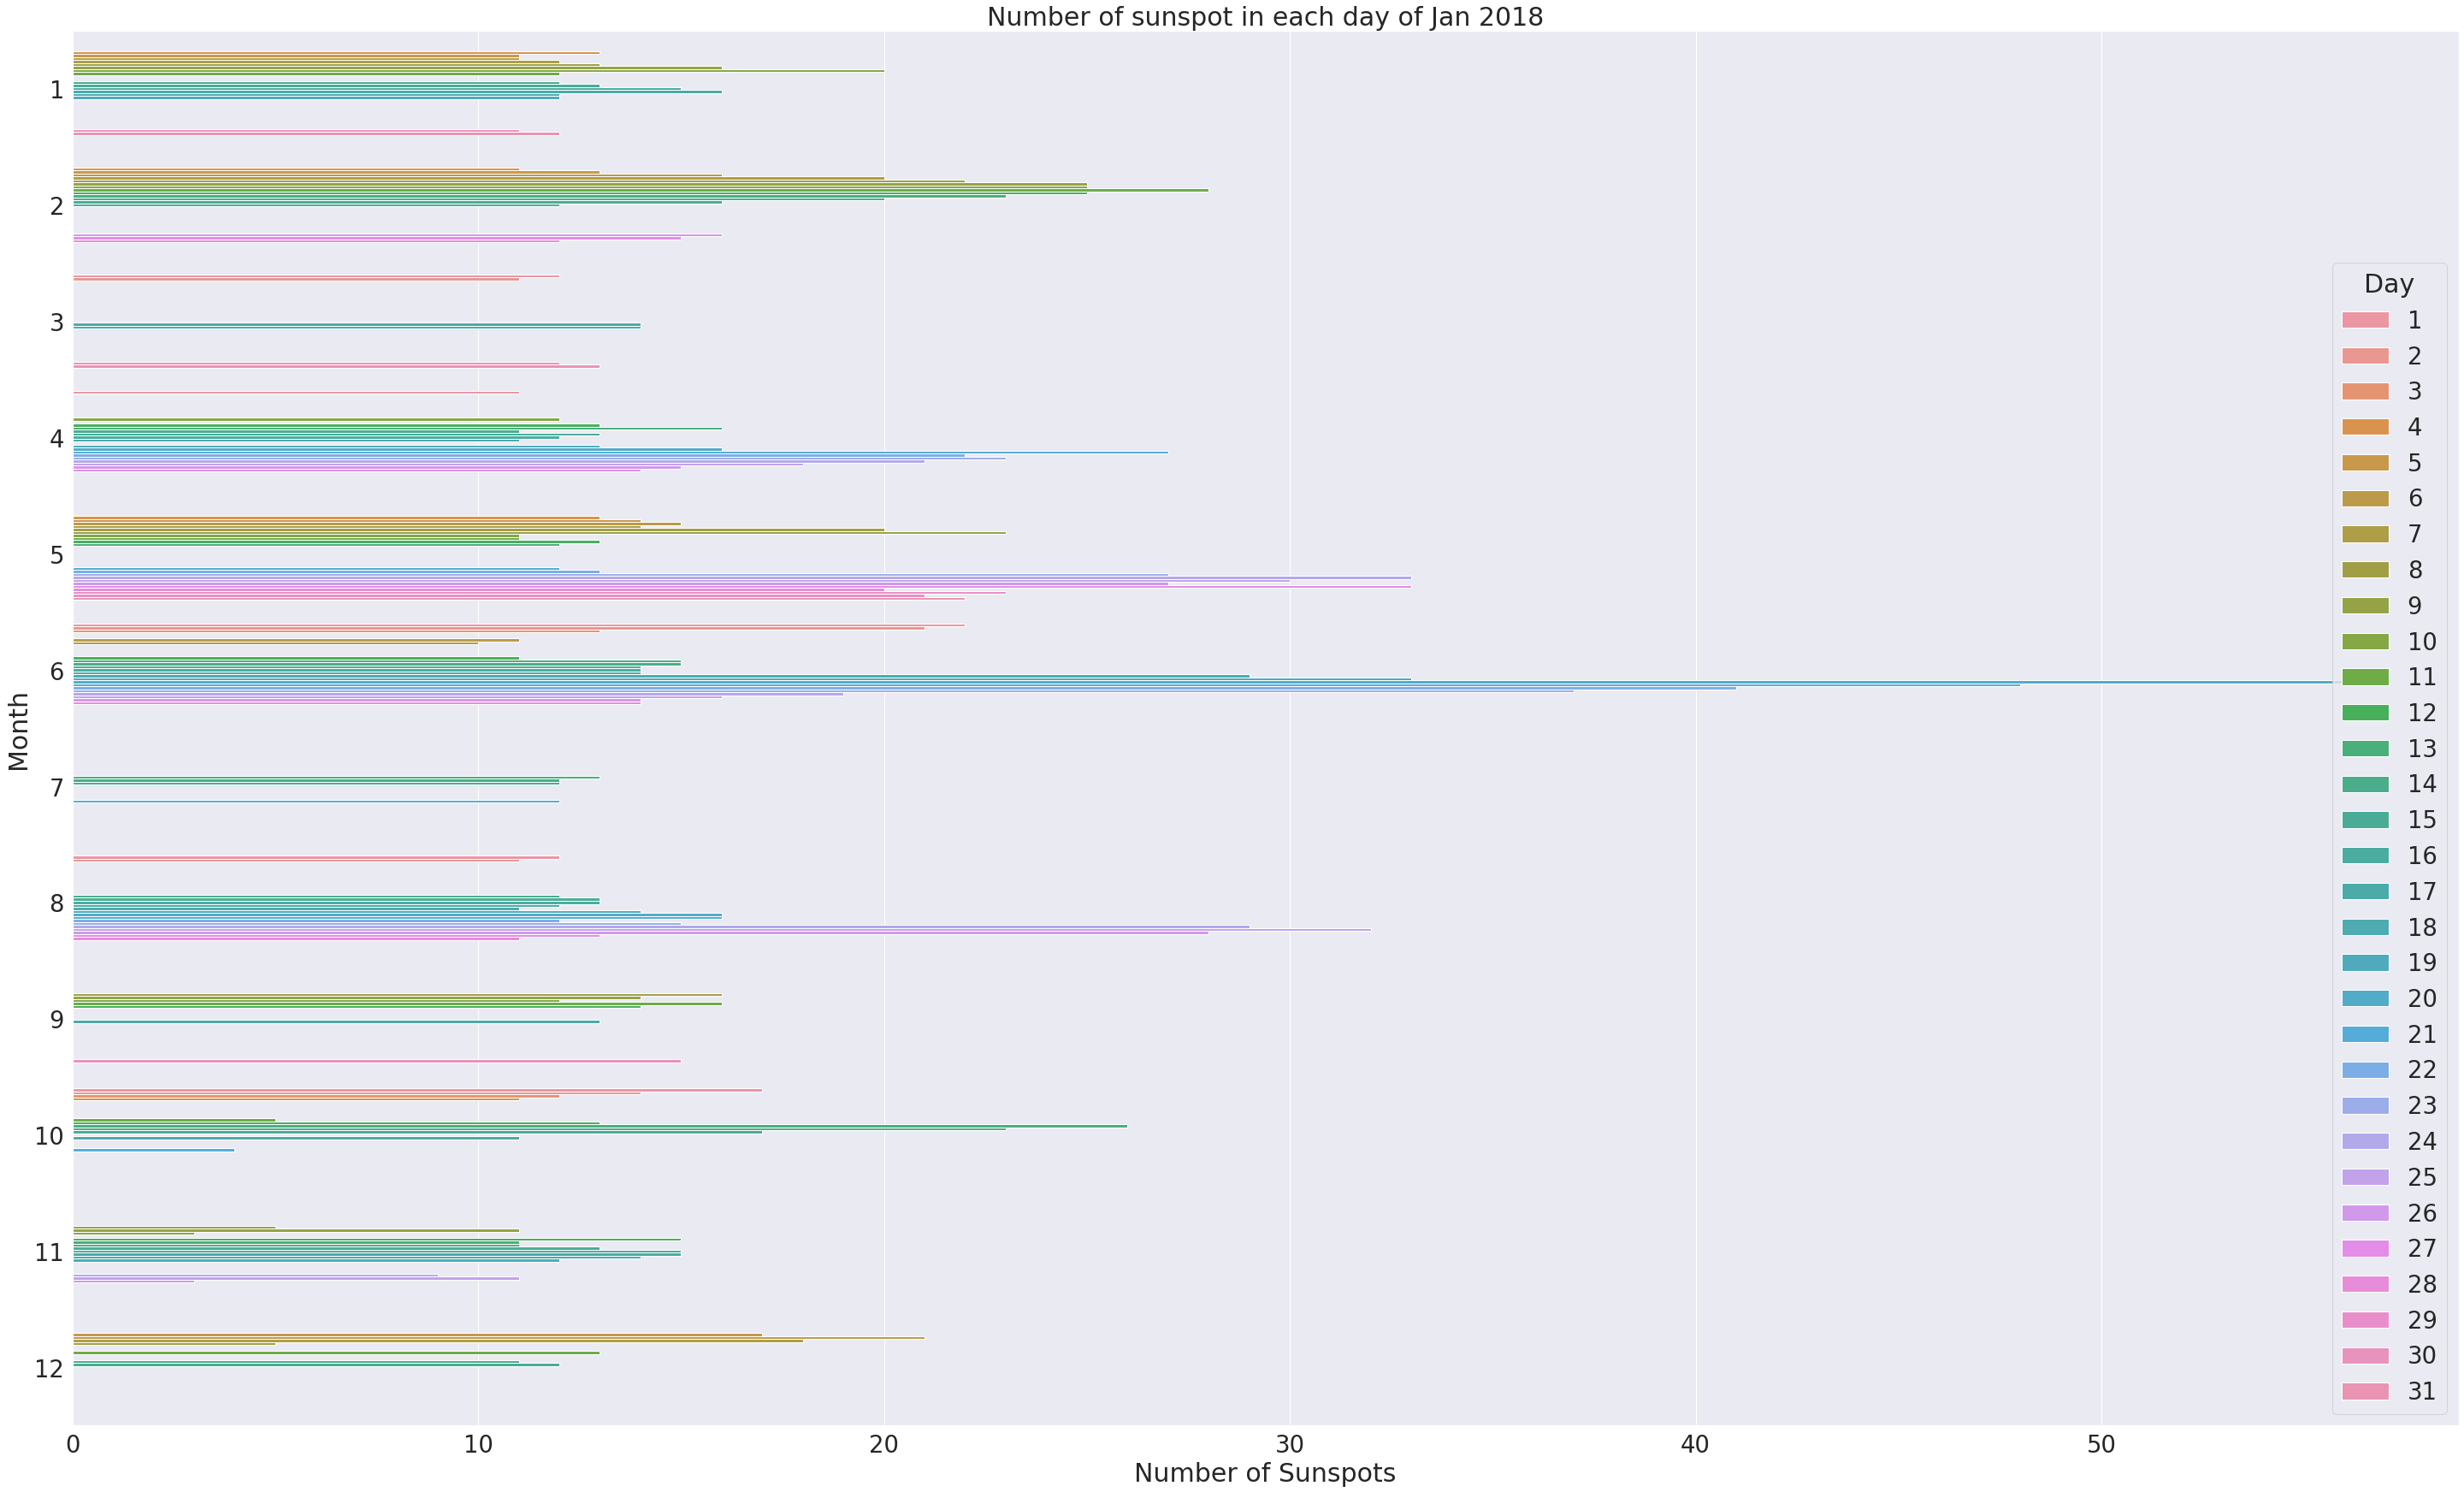

In [96]:
plt.figure(figsize=(50,30))
sns.set(font_scale = 2.5)
sns.barplot(data=df_2018, y='Month', x='Number of Sunspots', hue='Day', orient='h')
plt.title('Number of sunspot in each day of Jan 2018')

In [98]:
df_2018.head()

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
73049,2018,1,1,2018.001,0,0.0,23,1
73050,2018,1,2,2018.004,0,0.0,37,1
73051,2018,1,3,2018.007,0,0.0,33,1
73052,2018,1,4,2018.010,13,0.6,19,1
73053,2018,1,5,2018.012,11,0.9,16,1


Text(0.5, 1.0, 'Number of sunspot in each day of Jan 2018')

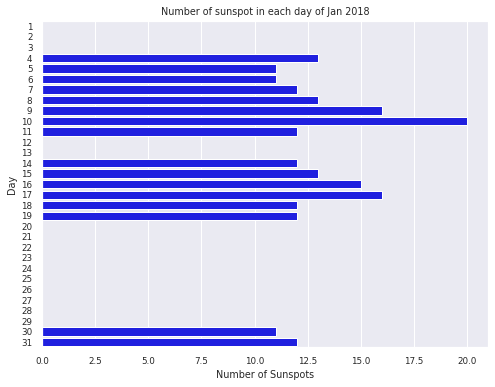

In [109]:
plt.figure(figsize=(8,6))
sns.set(font_scale=0.8)
sns.barplot(data=df_2018, y=df_2018['Day'][df_2018['Month']==1], x='Number of Sunspots', orient='h', color='blue')
plt.title('Number of sunspot in each day of Jan 2018')

Text(0.5, 1.0, 'Number of sunspot in each day of Feb 2018')

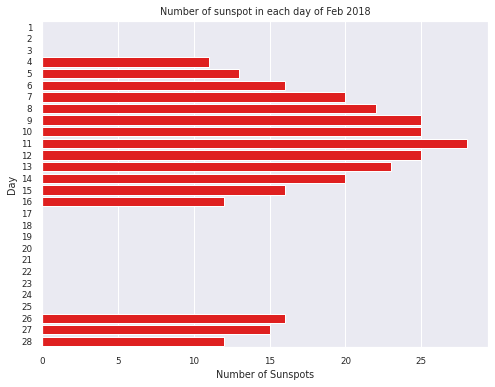

In [111]:
plt.figure(figsize=(8,6))
sns.set(font_scale=0.8)
sns.barplot(data=df_2018, y=df_2018['Day'][df_2018['Month']==2], x='Number of Sunspots', orient='h', color='red')
plt.title('Number of sunspot in each day of Feb 2018')

Text(0.5, 1.0, 'Number of sunspot in each day of Jun 2018')

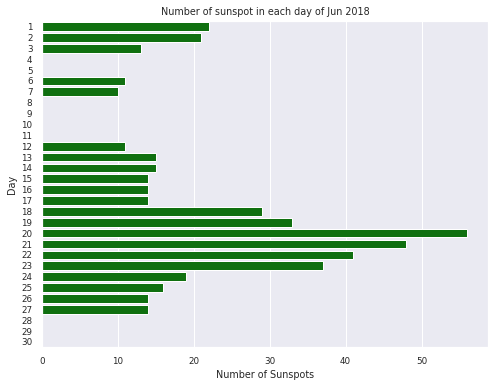

In [132]:
plt.figure(figsize=(8,6))
sns.set(font_scale=0.8)
sns.barplot(data=df_2018, y=df_2018['Day'][df_2018['Month']==6], x='Number of Sunspots', orient='h', color='green')
plt.title('Number of sunspot in each day of Jun 2018')

In [135]:
df.isnull().sum()

Year                        0
Month                       0
Day                         0
Date In Fraction Of Year    0
Number of Sunspots          0
Standard Deviation          0
Observations                0
Indicator                   0
dtype: int64

In [4]:
df.drop(['Month','Day','Observations', 'Indicator'], axis=1, inplace=True)

In [5]:
df

,Year,Date In Fraction Of Year,Number of Sunspots,Standard Deviation
0,1818,1818.001,-1,-1.0
1,1818,1818.004,-1,-1.0
2,1818,1818.007,-1,-1.0
3,1818,1818.010,-1,-1.0
4,1818,1818.012,-1,-1.0
...,...,...,...,...
73713,2019,2019.821,0,0.0
73714,2019,2019.823,0,0.0
73715,2019,2019.826,0,0.0
73716,2019,2019.829,0,0.0


In [6]:
from sklearn.model_selection import train_test_split

train, test=train_test_split(df, test_size=0.2, random_state=42)
train

,Year,Date In Fraction Of Year,Number of Sunspots,Standard Deviation
25834,1888,1888.731,18,4.8
30595,1901,1901.768,12,3.0
67547,2002,2002.938,179,9.4
36359,1917,1917.549,112,9.4
40427,1928,1928.687,172,11.7
...,...,...,...,...
37194,1919,1919.837,160,11.3
6265,1835,1835.155,-1,-1.0
54886,1968,1968.275,147,8.1
860,1820,1820.357,60,9.8


In [7]:
X=train.drop('Number of Sunspots', axis=1, inplace=False)
y=train['Number of Sunspots'].copy()

In [16]:
scale=StandardScaler()
X_scaled=scale.fit_transform(X)

In [17]:
lin_reg=LinearRegression()

lin_reg.fit(X_scaled, y)

LinearRegression()

In [36]:
lin_scores=cross_val_score(lin_reg, X_scaled, y, scoring='neg_mean_absolute_error', cv=10)
lin_mae=-lin_scores
lin_mae

def cost_fun(scores):
    print('Scores:', scores,
         'Mean:', scores.mean(),
         'Standard Deviation:', scores.std())

In [37]:
cost_fun(lin_mae)

Scores: [27.21077816 27.45575339 27.32588867 26.37522104 27.25226668 27.06564574
 26.96801563 27.20004121 27.33302689 27.09969291] Mean: 27.128633032259888 Standard Deviation: 0.28514191247161785


In [38]:
from sklearn.linear_model import Ridge, Lasso

ridge=Ridge()
ridge.fit(X_scaled, y)
ridge_scores=cross_val_score(ridge, X_scaled, y, cv=10, scoring='neg_mean_absolute_error')
ridge_mae=-ridge_scores

cost_fun(ridge_mae)

Scores: [27.21080862 27.45477018 27.32599388 26.37514283 27.2522472  27.06496493
 26.96503474 27.19815392 27.33302731 27.09913429] Mean: 27.127927789341832 Standard Deviation: 0.28520009193005896


In [39]:
param_grid=({
    'alpha': np.logspace(-5,5,10)
})

ridge_search=GridSearchCV(ridge, param_grid, cv=10, 
                         scoring='neg_mean_absolute_error',
                         return_train_score=True)
ridge_search.fit(X_scaled,y)


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [40]:
ridge_search.best_params_

{'alpha': 46.41588833612782}

In [41]:
ridge_model=ridge_search.best_estimator_
ridge_model.fit(X_scaled,y)
ridge_model_scores=cross_val_score(ridge_model, X_scaled, y, cv=10, scoring='neg_mean_absolute_error')
ridge_model_mae=-ridge_model_scores

cost_fun(ridge_model_mae)

Scores: [27.2115913  27.45371537 27.32808149 26.37486348 27.25122693 27.06551609
 26.9619704  27.19500424 27.33316753 27.09840589] Mean: 27.12735427128923 Standard Deviation: 0.2853830923954043


In [42]:
tree_reg=DecisionTreeRegressor()
tree_reg.fit(X_scaled, y)
tree_scores=cross_val_score(tree_reg, X_scaled, y, cv=10, scoring='neg_mean_absolute_error')
tree_mae=-tree_scores

cost_fun(tree_mae)

Scores: [4.46083418 4.34181078 4.31688708 4.06358087 4.37324063 4.57961675
 4.40342547 4.62099373 4.5007631  4.14719349] Mean: 4.380834608904196 Standard Deviation: 0.1671501669452142


In [43]:
random_forest=RandomForestRegressor()
random_forest.fit(X_scaled, y)

forest_score=cross_val_score(random_forest, X_scaled, y, cv=10, scoring='neg_mean_absolute_error')
forest_mae=-forest_score

cost_fun(forest_mae)

Scores: [3.64629196 3.66801289 3.64672092 3.38847067 3.63100051 3.82487197
 3.58696625 3.88670341 3.72873834 3.37928269] Mean: 3.6387059607183403 Standard Deviation: 0.154240571033558


### Training Model with polynomial features

In [48]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=3)
X_poly=poly.fit_transform(X_scaled)

lin_reg.fit(X_poly, y)

LinearRegression()

In [49]:
lin_scores=cross_val_score(lin_reg, X_poly, y, scoring='neg_mean_absolute_error', cv=10)
lin_mae=-lin_scores

cost_fun(lin_mae)

Scores: [17.87041059 18.18188424 17.69383484 16.96129449 17.98096439 17.69330643
 17.73144602 17.76776697 17.76489854 17.44317705] Mean: 17.708898356696302 Standard Deviation: 0.30998727083565675


In [50]:
tree_reg=DecisionTreeRegressor()
tree_reg.fit(X_poly, y)

tree_scores=cross_val_score(tree_reg, X_poly, y, cv=10, scoring='neg_mean_absolute_error')
tree_mae=-tree_scores

cost_fun(tree_mae)

Scores: [4.53526619 4.42641573 4.652255   4.05866395 4.20128879 4.59708326
 4.45294217 4.93488214 4.71934882 4.1989147 ] Mean: 4.477706077651659 Standard Deviation: 0.25463777720551956


In [47]:
random_forest=RandomForestRegressor()
random_forest.fit(X_poly, y)

forest_score=cross_val_score(random_forest, X_poly, y, cv=5, scoring='neg_mean_absolute_error')
forest_mae=-forest_score

cost_fun(forest_mae)

Scores: [3.77202798 3.68067147 3.8763671  3.84079695 3.64333814] Mean: 3.762640327903994 Standard Deviation: 0.08953465361918901


It ( Polynomial) does not make sense

In [51]:

param_grid = [
    # Try 20 (4*5) combination of hyperparameters
    {'n_estimators': [10, 20, 40], 'max_features': [2, 3]},
    # Try bootstrap as False with 12 combination
    {'bootstrap': [False], 'n_estimators': [20, 40], 'max_features': [2, 3]},
]
forest_reg = RandomForestRegressor(random_state=42)
# Train across 5 fold, that is a total of (16 + 12)*5 rounds of training
forest_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_absolute_error",
                           return_train_score=True)
forest_search.fit(X_scaled, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 3], 'n_estimators': [10, 20, 40]},
                         {'bootstrap': [False], 'max_features': [2, 3],
                          'n_estimators': [20, 40]}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [52]:
forest_search.best_params_

{'max_features': 3, 'n_estimators': 40}

In [53]:
forest_model=forest_search.best_estimator_

forest_model.fit(X_scaled, y)

forest_model_score=cross_val_score(forest_model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
forest_model_rmse=np.sqrt(-forest_model_score)

cost_fun(forest_model_rmse)

Scores: [1.93250075 1.90019633 1.95849688 1.95146927 1.89465435] Mean: 1.9274635151517394 Standard Deviation: 0.02601791958881354


let's go through our `test_set` for final `MAE`

In [54]:
test

,Year,Date In Fraction Of Year,Number of Sunspots,Standard Deviation
56571,1972,1972.887,82,6.0
66678,2000,2000.559,286,15.9
36998,1919,1919.300,27,4.6
16814,1864,1864.037,87,11.3
48277,1950,1950.179,261,10.8
...,...,...,...,...
61615,1986,1986.697,0,2.0
41229,1930,1930.884,72,7.6
43935,1938,1938.292,178,11.9
31396,1903,1903.963,92,8.5


In [57]:
X_test=test.drop('Number of Sunspots', axis=1, inplace=False)
y_test=test['Number of Sunspots'].copy()

X_test_scaled=scale.transform(X_test)
final_prediction=forest_model.predict(X_test_scaled)
final_mae=mean_absolute_error(final_prediction, y_test)
final_mae=np.sqrt(final_mae)
final_mae

1.8667815908315593